In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load the data (replace 'flight_data.csv' with your file path)
data = pd.read_csv('Data_Train.csv')

In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Missing Values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.shape

(10683, 11)

In [7]:
data.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL ? BOM ? COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [8]:
data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Check unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']:
    print(f"{column}: {data[column].unique()}")




Unique Values in Categorical Columns:
Airline: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total_Stops: ['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
Additional_Info: ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [10]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
data['Journey_day'] = pd.to_datetime(data['Date_of_Journey'], format= '%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey'], format= '%d/%m/%Y').dt.month

In [12]:

## Dropping Date_of_Journey
data.drop('Date_of_Journey', axis = 1, inplace=True)

In [13]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [14]:
data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int32
Journey_Month       int32
dtype: object

In [15]:
# Converting the datatype of arrival and dep time into hour and minutes
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Min'] = pd.to_datetime(data['Dep_Time']).dt.minute
data.drop('Dep_Time', axis = 1, inplace = True)
data['Arr_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arr_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop('Arrival_Time', axis = 1, inplace = True)




C:\Users\jaisw\AppData\Local\Temp\ipykernel_36180\1868379442.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
C:\Users\jaisw\AppData\Local\Temp\ipykernel_36180\1868379442.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Min'] = pd.to_datetime(data['Dep_Time']).dt.minute
C:\Users\jaisw\AppData\Local\Temp\ipykernel_36180\1868379442.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arr_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
C:\Users\jaisw\AppData\Local\Temp\ipykernel_36180\186837

In [16]:
# Convert Duration to minutes
def to_minutes(duration):
    if isinstance(duration, str):
        hours = 0
        mins = 0
        parts = duration.split()
        for part in parts:
            if 'h' in part:
                hours = int(part.replace('h', ''))
            if 'm' in part:
                mins = int(part.replace('m', ''))
        return hours * 60 + mins
    return duration
data['Duration_Min'] = data['Duration'].apply(to_minutes)
data = data.drop(['Duration'], axis =1)

In [17]:
data.Airline.value_counts()


Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

Exploratory Data Analysis

In [18]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_min', 'Duration_Min'],
      dtype='object')

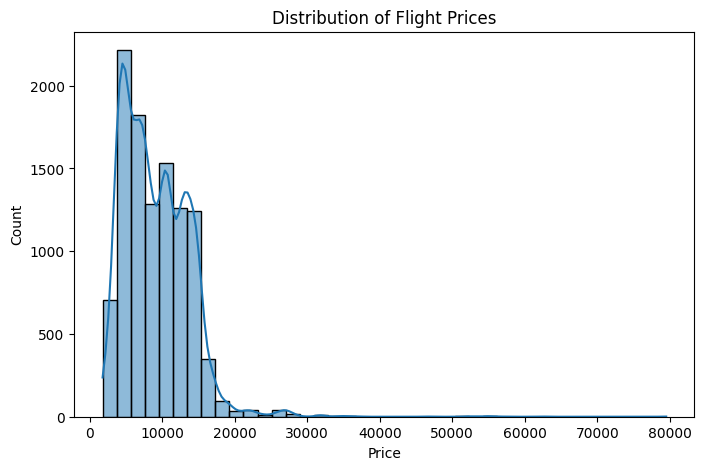

In [19]:
#Distribution of flight prices
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], bins=40, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Feature Analysis

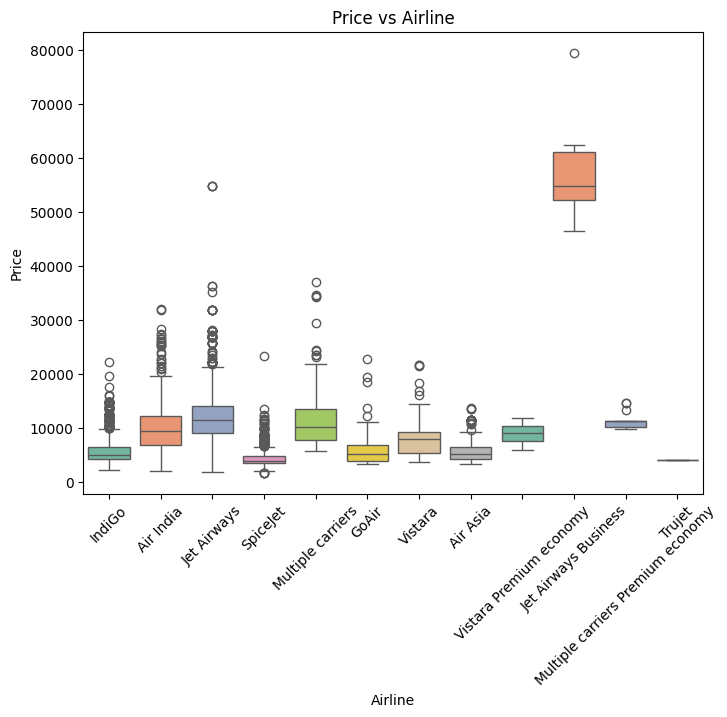

In [20]:
# Price vs Airline
plt.figure(figsize=(8,6))
sns.boxplot(x='Airline', y= 'Price', hue='Airline', data=data, palette = 'Set2')
plt.xticks(rotation = 45)
plt.title('Price vs Airline')
plt.show()

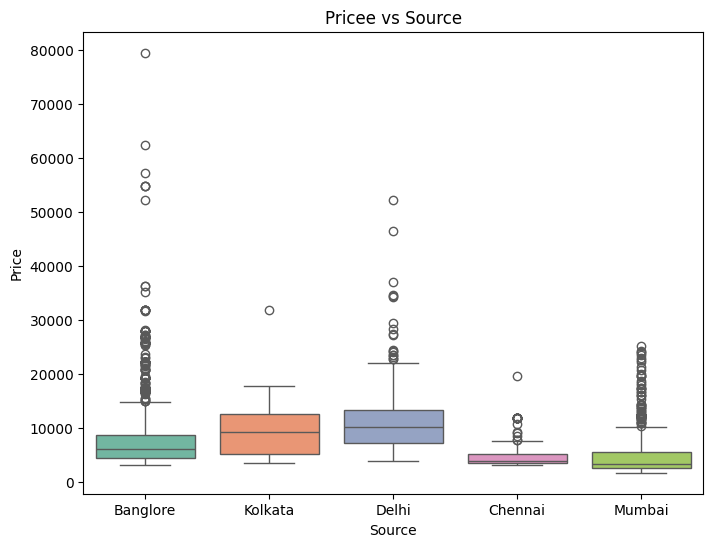

In [21]:
# Price vs Source
plt.figure(figsize=(8,6))
sns.boxplot(x='Source', y = 'Price', hue='Source', data = data, palette = 'Set2')
plt.title('Pricee vs Source')
plt.show()

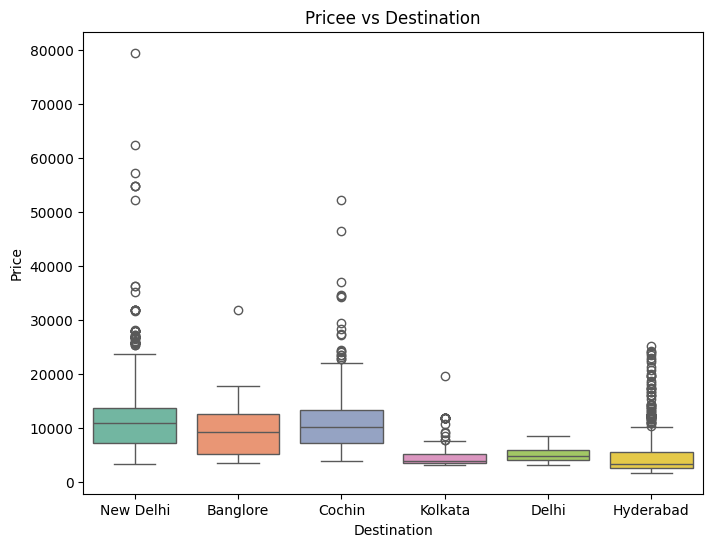

In [22]:
# Price vs Destination
plt.figure(figsize=(8,6))
sns.boxplot(x='Destination', y = 'Price', hue ='Destination',data = data,  palette = 'Set2')
plt.title('Pricee vs Destination')
plt.show()

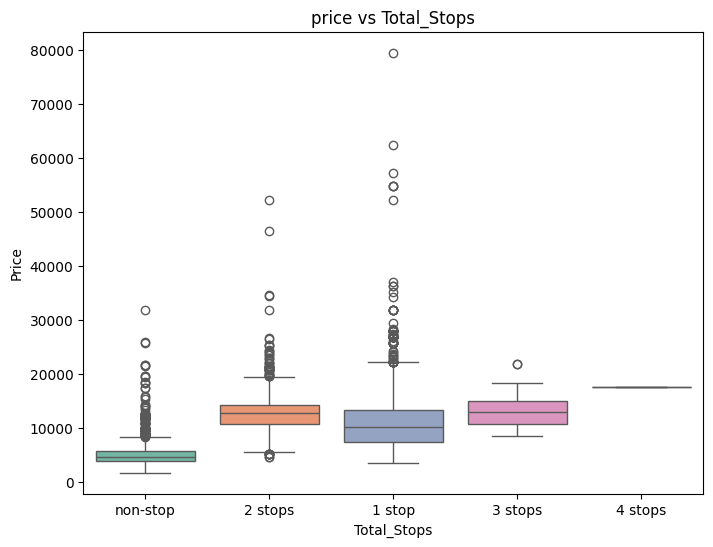

In [23]:
# Price vs Total_stops
plt.figure(figsize=(8,6))
sns.boxplot(x='Total_Stops', y= 'Price', hue = 'Total_Stops', data=data,  palette = 'Set2')
plt.title('price vs Total_Stops')
plt.show()

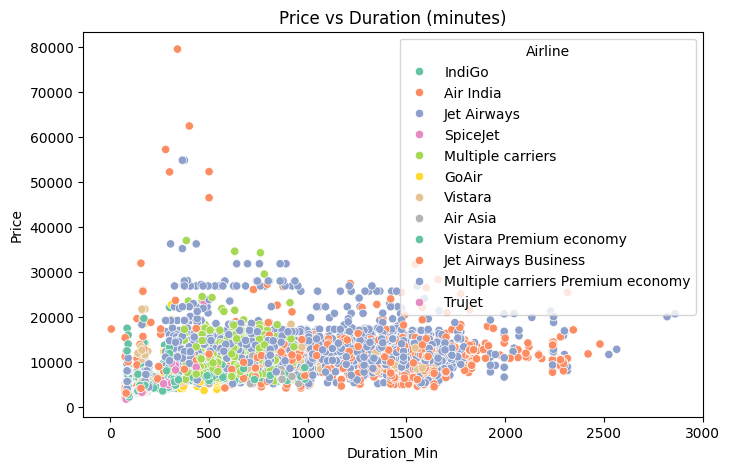

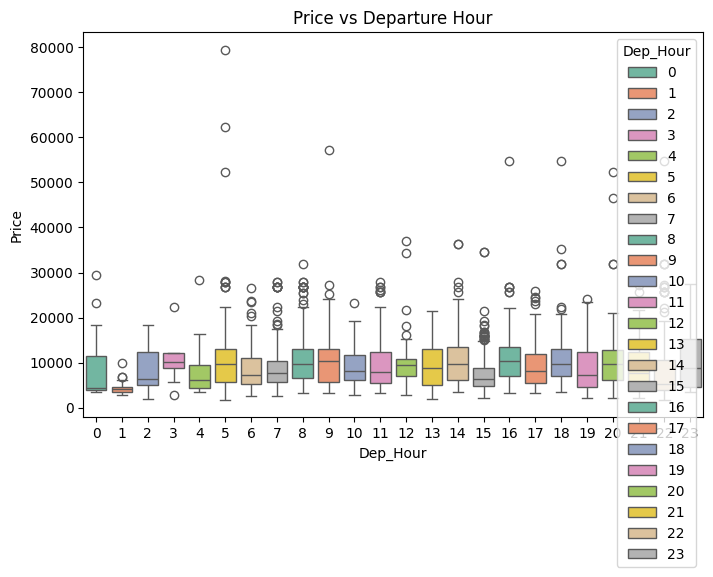

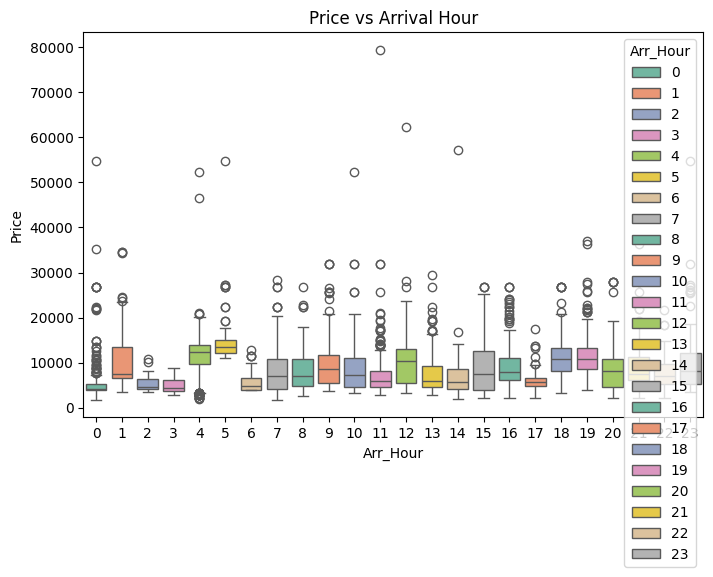

In [24]:
# Price vs Time
# Price vs Duration_Min
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration_Min', y='Price',hue = 'Airline', data=data, palette = 'Set2')
plt.title('Price vs Duration (minutes)')

#Price vs Dep_Hour
plt.figure(figsize=(8, 5))
sns.boxplot(x='Dep_Hour', y='Price', hue = 'Dep_Hour', data=data, palette = 'Set2')
plt.title('Price vs Departure Hour')
plt.show()

#Price vs Arrival_Hour
plt.figure(figsize=(8, 5))
sns.boxplot(x='Arr_Hour', y='Price', hue = 'Arr_Hour', data=data, palette = 'Set2')
plt.title('Price vs Arrival Hour')
plt.show()


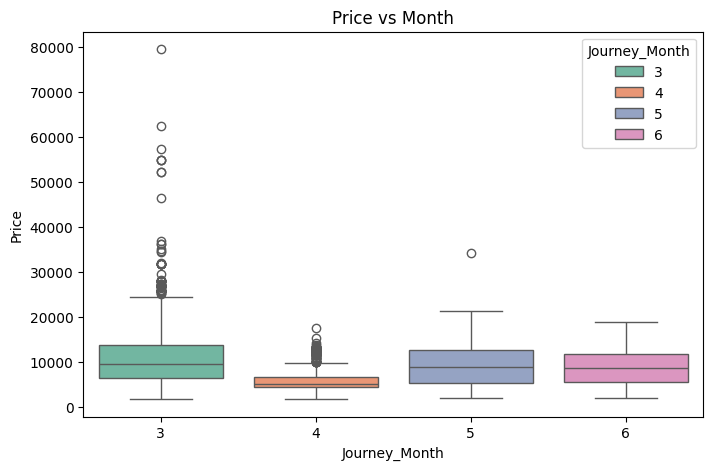

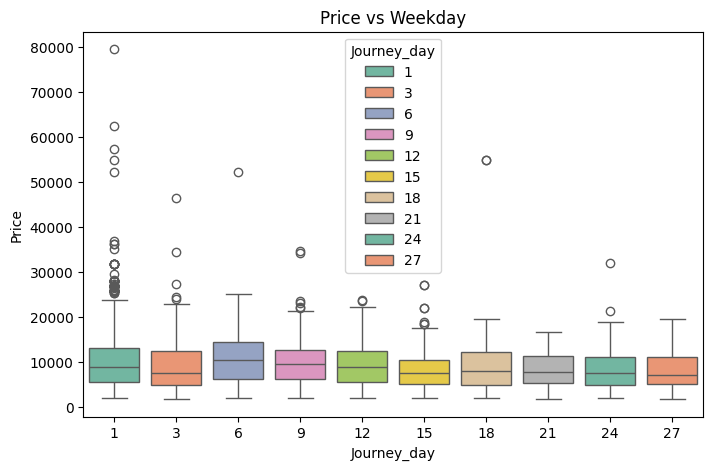

In [25]:
# Price vs Month
plt.figure(figsize=(8, 5))
sns.boxplot(x='Journey_Month', y='Price', hue = 'Journey_Month', data=data, palette = 'Set2')
plt.title('Price vs Month')
plt.show()

# Price vs day
plt.figure(figsize=(8, 5))
sns.boxplot(x='Journey_day', y='Price', hue = 'Journey_day', data=data, palette = 'Set2')
plt.title('Price vs Weekday')
plt.show()

In [26]:
# Encode categorical variables
data['Total_Stops'] = data['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
data = pd.get_dummies(data, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)

In [27]:
data.columns

Index(['Route', 'Total_Stops', 'Price', 'Journey_day', 'Journey_Month',
       'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_min', 'Duration_Min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_

In [28]:
data = data.drop(['Route'], axis =1)

In [29]:
data


,Total_Stops,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_min,Duration_Min,Airline_Air India,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,170,False,...,True,False,False,False,False,False,False,False,True,False
1,2,7662,1,5,5,50,13,15,445,True,...,False,False,False,False,False,False,False,False,True,False
2,2,13882,9,6,9,25,4,25,1140,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6218,12,5,18,5,23,30,325,False,...,False,False,False,False,False,False,False,False,True,False
4,1,13302,1,3,16,50,21,35,285,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,150,False,...,False,False,False,False,False,False,False,False,True,False
10679,0,4145,27,4,20,45,23,20,155,True,...,False,False,False,False,False,False,False,False,True,False
10680,0,7229,27,4,8,20,11,20,180,False,...,False,False,False,False,False,False,False,False,True,False
10681,0,12648,1,3,11,30,14,10,160,False,...,True,False,False,False,False,False,False,False,True,False


In [30]:
data.duplicated().sum()
data.drop_duplicates(inplace = True)

In [31]:
modified_data = data.copy()
modified_data

,Total_Stops,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_min,Duration_Min,Airline_Air India,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,170,False,...,True,False,False,False,False,False,False,False,True,False
1,2,7662,1,5,5,50,13,15,445,True,...,False,False,False,False,False,False,False,False,True,False
2,2,13882,9,6,9,25,4,25,1140,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6218,12,5,18,5,23,30,325,False,...,False,False,False,False,False,False,False,False,True,False
4,1,13302,1,3,16,50,21,35,285,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,150,False,...,False,False,False,False,False,False,False,False,True,False
10679,0,4145,27,4,20,45,23,20,155,True,...,False,False,False,False,False,False,False,False,True,False
10680,0,7229,27,4,8,20,11,20,180,False,...,False,False,False,False,False,False,False,False,True,False
10681,0,12648,1,3,11,30,14,10,160,False,...,True,False,False,False,False,False,False,False,True,False


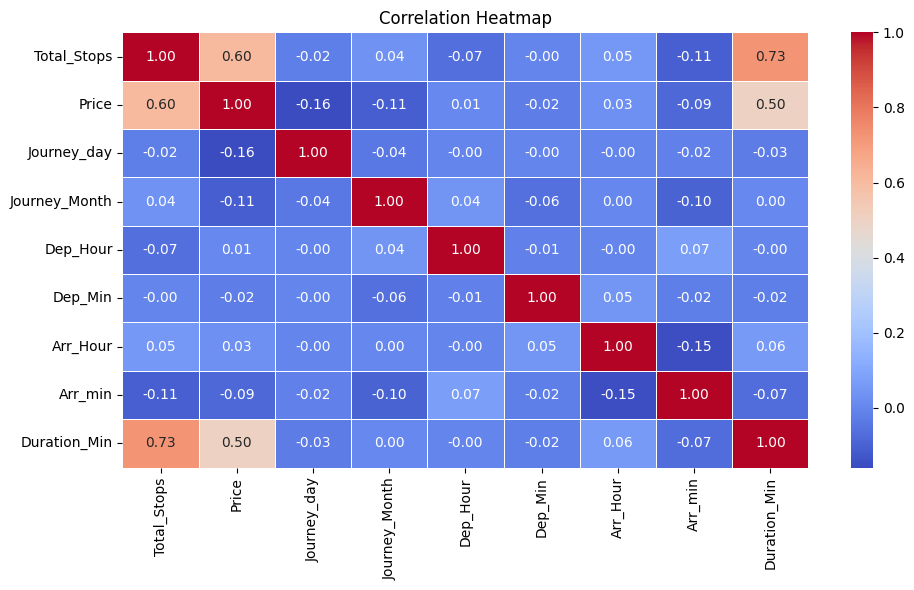

In [32]:
# Compute Correlation matrix
corr = data.iloc[:, :9].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=12)
plt.tight_layout()
plt.show()


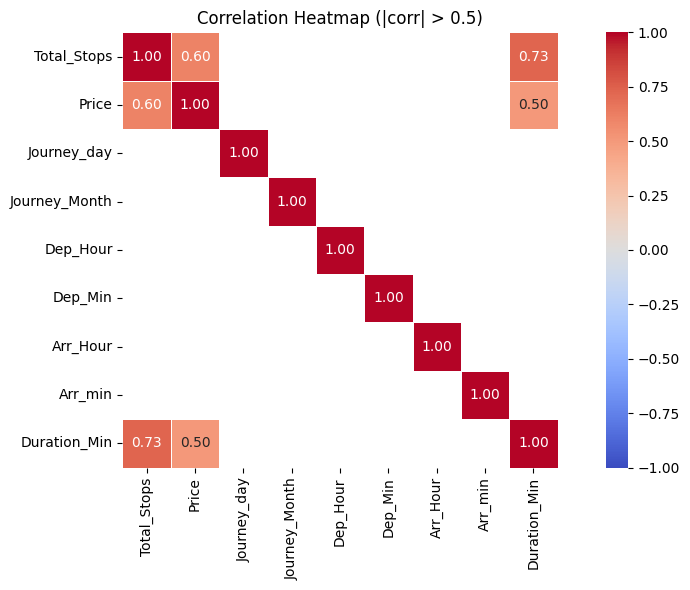

In [33]:
# Compute and mask weak correlations (|corr| ≤ 0.5)
masked_corr = corr.mask(np.abs(corr) <= 0.5)
plt.figure(figsize=(10, 6))
sns.heatmap(masked_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, square=True)

plt.title("Correlation Heatmap (|corr| > 0.5)", fontsize=12)
plt.tight_layout()
plt.show()

Modelling

In [34]:
! pip install scikit-learn xgboost joblib



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Import ML & evaluation libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

Train - Test Split

In [36]:
X = modified_data.drop(['Price'], axis =1)
Y = modified_data['Price']

# Train-Test split(80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [37]:
X_train.shape

(8368, 37)

Linear Regression

In [38]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MAE:", mean_absolute_error(Y_test, Y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))
print("R² Score:", r2_score(Y_test, Y_pred_lr))

Linear Regression:
MAE: 1773.7785375051137
RMSE: 2567.8038473260267
R² Score: 0.6655071534179267


Random Forest Regressor

In [39]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

print("\n Random Forest:")
print("MAE:", mean_absolute_error(Y_test, Y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("R² Score:", r2_score(Y_test, Y_pred_rf))


 Random Forest:
MAE: 678.1022523046983
RMSE: 1486.8276875522536
R² Score: 0.8878538357951503


XGBoost Regressor

In [40]:
xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)

print("\n XGBoost:")
print("MAE:", mean_absolute_error(Y_test, Y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R² Score:", r2_score(Y_test, Y_pred_xgb))


 XGBoost:
MAE: 771.857666015625
RMSE: 1416.5026914905598
R² Score: 0.8982117176055908


Decision Tree regressor

In [41]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

# Evaluation
print("\n Decision Tree:")
print("MAE:", mean_absolute_error(Y_test, Y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_dt)))
print("R² Score:", r2_score(Y_test, Y_pred_dt))


 Decision Tree:
MAE: 757.6739961759082
RMSE: 1816.901882470766
R² Score: 0.8325342133786737


Lasso Regression

In [42]:
lasso = Lasso(alpha=0.1)  # You can tune this alpha using GridSearchCV
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)

# Evaluation
print("\n Lasso Regression:")
print("MAE:", mean_absolute_error(Y_test, Y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)))
print("R² Score:", r2_score(Y_test, Y_pred_lasso))


 Lasso Regression:
MAE: 1774.1727671256467
RMSE: 2568.270251127716
R² Score: 0.6653856309708033


In [43]:
# Hyperparameter Tuning for Lasso
# Define parameter grid for Lasso
params_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(Lasso(), param_grid=params_lasso, scoring='neg_mean_absolute_error', cv=3)
grid_lasso.fit(X_train, Y_train)

best_lasso = grid_lasso.best_estimator_
Y_pred_best_lasso = best_lasso.predict(X_test)

print("\n Tuned Lasso Regression:")
print("Best Alpha:", grid_lasso.best_params_['alpha'])
print("MAE:", mean_absolute_error(Y_test, Y_pred_best_lasso))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_best_lasso)))
print("R² Score:", r2_score(Y_test, Y_pred_best_lasso))

c:\Users\jaisw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.067e+08, tolerance: 1.230e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\jaisw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.749e+09, tolerance: 1.173e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\jaisw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca


 Tuned Lasso Regression:
Best Alpha: 0.001
MAE: 1773.7799523998992
RMSE: 2567.8081338221164
R² Score: 0.6655060366632516


c:\Users\jaisw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.197e+09, tolerance: 1.825e+07
  model = cd_fast.enet_coordinate_descent(


Evaluation metrics for all models

In [44]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [
        mean_absolute_error(Y_test, Y_pred_lr),
        mean_absolute_error(Y_test, Y_pred_lasso),
        mean_absolute_error(Y_test, Y_pred_dt),
        mean_absolute_error(Y_test, Y_pred_rf),
        mean_absolute_error(Y_test, Y_pred_xgb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(Y_test, Y_pred_lr)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_dt)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_rf)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_xgb))
    ],
    'R2 Score': [
        r2_score(Y_test, Y_pred_lr),
        r2_score(Y_test, Y_pred_lasso),
        r2_score(Y_test, Y_pred_dt),
        r2_score(Y_test, Y_pred_rf),
        r2_score(Y_test, Y_pred_xgb)
    ]
})

results.sort_values(by='RMSE', ascending=True)


,Model,MAE,RMSE,R2 Score
4,XGBoost,771.857666,1416.502691,0.898212
3,Random Forest,678.102252,1486.827688,0.887854
2,Decision Tree,757.673996,1816.901882,0.832534
0,Linear Regression,1773.778538,2567.803847,0.665507
1,Lasso Regression,1774.172767,2568.270251,0.665386


RSME lower is better or R2 Score higher is better

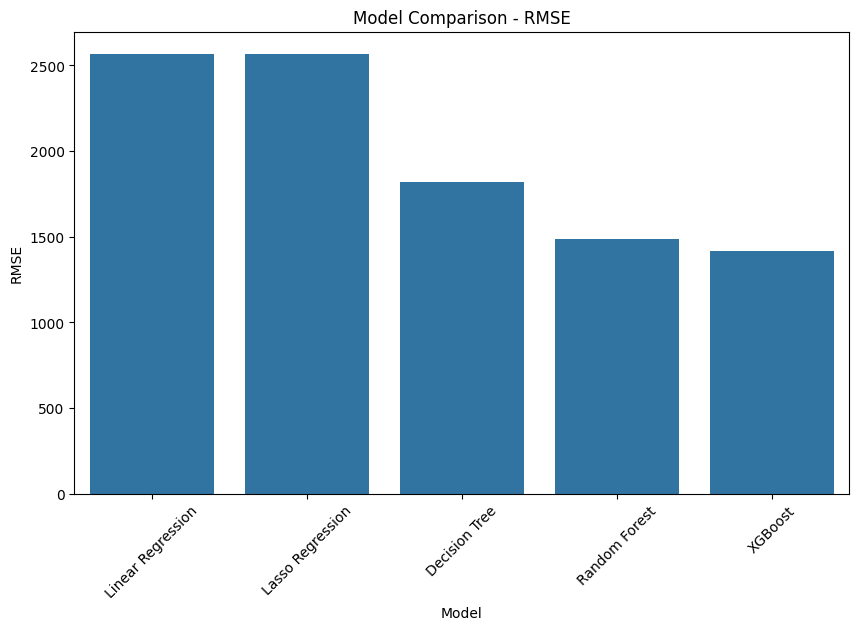

In [45]:
# Visual Comparision of Performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title("Model Comparison - RMSE")
plt.xticks(rotation=45)
plt.show()

Hyperparameter Tuning

XGB regressor

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


# Base model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter search space
param_dist = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [3, 5, 8, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7]
}


In [47]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run the search
random_search.fit(X_train, Y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,50
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [48]:
print("Best Parameters:")
print(random_search.best_params_)

best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(Y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R2 Score:", r2_score(Y_test, y_pred))


Best Parameters:
{'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.6}
MAE: 703.4120483398438
RMSE: 1403.6507756561102
R2 Score: 0.9000503420829773


Lasso Regression

In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

lasso = Lasso(random_state=42, max_iter=10000)

param_dist_lasso = {
    'alpha': uniform(0.0001, 1.0)  # Uniform distribution for alpha (regularization strength)
}

random_lasso = RandomizedSearchCV(
    lasso, param_distributions=param_dist_lasso,
    scoring='neg_root_mean_squared_error',
    n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1
)

random_lasso.fit(X_train, Y_train)

print("Best Lasso Params:", random_lasso.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Lasso Params: {'alpha': np.float64(0.020684494295802446)}


Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

param_dist_dt = {
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2', None]
}

random_dt = RandomizedSearchCV(
    dt, param_distributions=param_dist_dt,
    scoring='neg_root_mean_squared_error',
    n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1
)

random_dt.fit(X_train, Y_train)
print("Best Decision Tree Params:", random_dt.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Decision Tree Params: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}


Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

random_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf,
    scoring='neg_root_mean_squared_error',
    n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1
)

random_rf.fit(X_train, Y_train)
print("Best Random Forest Params:", random_rf.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Random Forest Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}


XGboost regressor

In [52]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist_xgb = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [3, 5, 8, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7]
}

random_xgb = RandomizedSearchCV(
    xgb, param_distributions=param_dist_xgb,
    scoring='neg_root_mean_squared_error',
    n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1
)

random_xgb.fit(X_train, Y_train)
print("Best XGBoost Params:", random_xgb.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8}


In [53]:

# Dictionary to store metrics
model_scores = {}

# Replace with your actual best estimators
models = {
    "Lasso Regression": random_lasso.best_estimator_,
    "Decision Tree": random_dt.best_estimator_,
    "Random Forest": random_rf.best_estimator_,
    "XGBoost": random_xgb.best_estimator_,
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)
    
    model_scores[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert to DataFrame
score_df = pd.DataFrame(model_scores).T
print(score_df)


                          MAE         RMSE  R2 Score
Lasso Regression  1773.817457  2567.889425  0.665485
Decision Tree      863.989137  1799.467208  0.835733
Random Forest      675.586055  1475.687857  0.889528
XGBoost            696.787903  1405.955991  0.899722


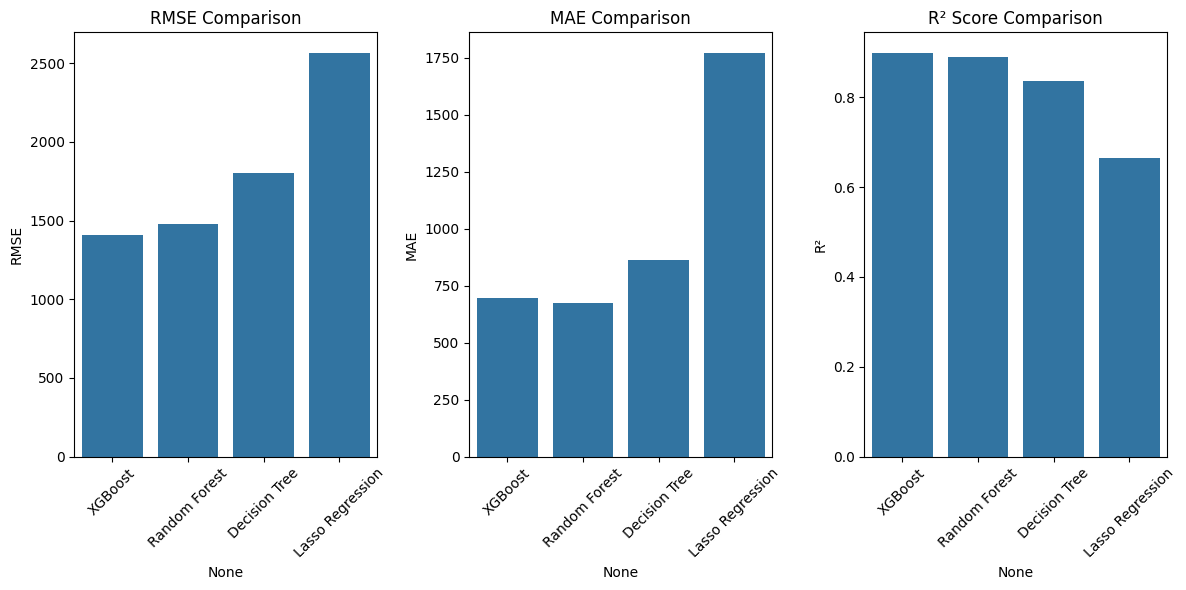

In [54]:
plt.figure(figsize=(12, 6))
score_df_sorted = score_df.sort_values(by="RMSE")

# Plot RMSE
plt.subplot(1, 3, 1)
sns.barplot(x=score_df_sorted.index, y=score_df_sorted["RMSE"])
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.xticks(rotation=45)

# Plot MAE
plt.subplot(1, 3, 2)
sns.barplot(x=score_df_sorted.index, y=score_df_sorted["MAE"])
plt.title("MAE Comparison")
plt.ylabel("MAE")
plt.xticks(rotation=45)

# Plot R² Score
plt.subplot(1, 3, 3)
sns.barplot(x=score_df_sorted.index, y=score_df_sorted["R2 Score"])
plt.title("R² Score Comparison")
plt.ylabel("R²")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [55]:
# Combine train & test data
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([Y_train, Y_test], axis=0)

# best_model 
best_model = random_xgb.best_estimator_

# Retrain on full data
best_model.fit(X_full, y_full)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [56]:
import joblib

# Save model
joblib.dump(best_model, "best_flight_fare_model.pkl")

print("Model saved as best_flight_fare_model.pkl")


Model saved as best_flight_fare_model.pkl


In [64]:
import pandas as pd
import numpy as np

def predict_prices_for_airlines(best_model, X_columns, input_dict):
    # """
    # Predicts flight prices for each airline given user input and finds the cheapest.
    
    # Parameters:
    # - best_model: Trained XGBoost model (RandomizedSearchCV best_estimator_).
    # - X_columns: List of feature columns from X (e.g., X.columns).
    # - input_dict: Dict with keys like 'Total_Stops', 'Journey_day', 'Journey_Month', 
    #               'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_min', 'Duration_Min', 
    #               'Source', 'Destination', 'Additional_Info'.
    
    # Returns:
    # - Prints predicted prices for each airline and the cheapest one.
    # """
    # Define airline columns (from your Index)
    airline_cols = [
        'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
        'Airline_Jet Airways Business', 'Airline_Multiple carriers',
        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'
    ]
    source_cols = ['Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']
    dest_cols = ['Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 
                 'Destination_Kolkata', 'Destination_New Delhi']
    add_cols = ['Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
                'Additional_Info_Business class', 'Additional_Info_Change airports',
                'Additional_Info_In-flight meal not included', 'Additional_Info_No info',
                'Additional_Info_No check-in baggage included', 'Additional_Info_Red-eye flight']
    non_encoded_cols = ['Total_Stops', 'Journey_day', 'Journey_Month', 'Dep_Hour', 
                        'Dep_Min', 'Arr_Hour', 'Arr_min', 'Duration_Min']  # Excludes Route if dropped

    # Validate input
    required_keys = non_encoded_cols + ['Source', 'Destination', 'Additional_Info']
    missing_keys = [key for key in required_keys if key not in input_dict]
    if missing_keys:
        raise ValueError(f"Missing input keys: {missing_keys}")

    # Create base input row (zero-filled DataFrame with all model columns)
    input_row = pd.DataFrame(0, index=[0], columns=X_columns)

    # Set non-encoded features
    for col in non_encoded_cols:
        input_row[col] = input_dict[col]

    # Encode Source
    source_col = f"Source_{input_dict['Source']}"
    if source_col in source_cols:
        input_row[source_col] = 1
    else:
        print(f"Warning: Unknown Source '{input_dict['Source']}' ignored")

    # Encode Destination
    dest_col = f"Destination_{input_dict['Destination']}"
    if dest_col in dest_cols:
        input_row[dest_col] = 1
    else:
        print(f"Warning: Unknown Destination '{input_dict['Destination']}' ignored")

    # Encode Additional_Info (lowercase to handle 'No info'/'No Info')
    add_info = input_dict['Additional_Info'].lower()
    add_col = next((col for col in add_cols if col.lower() == f"additional_info_{add_info}"), None)
    if add_col:
        input_row[add_col] = 1
    else:
        print(f"Warning: Unknown Additional_Info '{input_dict['Additional_Info']}' ignored")

    # Predict for each airline
    prices = {}
    for airline_col in airline_cols:
        airline_name = airline_col.replace('Airline_', '').replace('_', ' ')
        input_copy = input_row.copy()
        input_copy[airline_col] = 1  # Set this airline to 1
        pred_price = best_model.predict(input_copy)[0]
        prices[airline_name] = round(pred_price, 2)

    # Find cheapest airline
    min_airline = min(prices, key=prices.get)
    min_price = prices[min_airline]

    # Print results
    print("Predicted Prices for Each Airline (INR):")
    for airline, price in sorted(prices.items(), key=lambda x: x[1]):
        print(f"{airline}: {price}")
    print(f"\nCheapest Airline: {min_airline} at {min_price} INR")

# Example usage (based on Row 0 from your data)
user_input = {
    'Total_Stops': 0,
    'Journey_day': 24,
    'Journey_Month': 3,
    'Dep_Hour': 6,
    'Dep_Min': 20,
    'Arr_Hour': 1,
    'Arr_min': 10,
    'Duration_Min': 170,
    'Source': 'Chennai',
    'Destination': 'Delhi',
    'Additional_Info': 'No info'
}

# Run prediction (assumes best_model and X exist)
predict_prices_for_airlines(best_model, X.columns, user_input)

Predicted Prices for Each Airline (INR):
Trujet: 1513.27001953125
GoAir: 3187.1298828125
SpiceJet: 4077.1298828125
IndiGo: 4300.35986328125
Vistara: 4845.47021484375
Vistara Premium economy: 4913.52001953125
Multiple carriers: 4924.14013671875
Air India: 5125.509765625
Multiple carriers Premium economy: 5876.89013671875
Jet Airways: 6871.669921875
Jet Airways Business: 32863.80078125

Cheapest Airline: Trujet at 1513.27001953125 INR


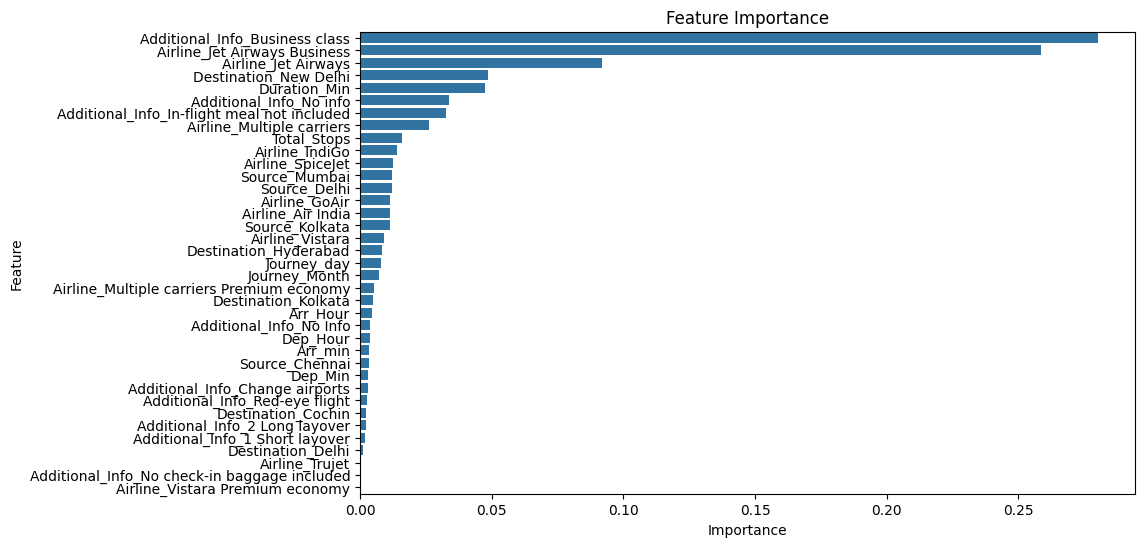

In [57]:

# Feature importance
importances = best_model.feature_importances_
feature_names = X_full.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance")
plt.show()


MAE: 336.04, RMSE: 566.51, R²: 0.9850


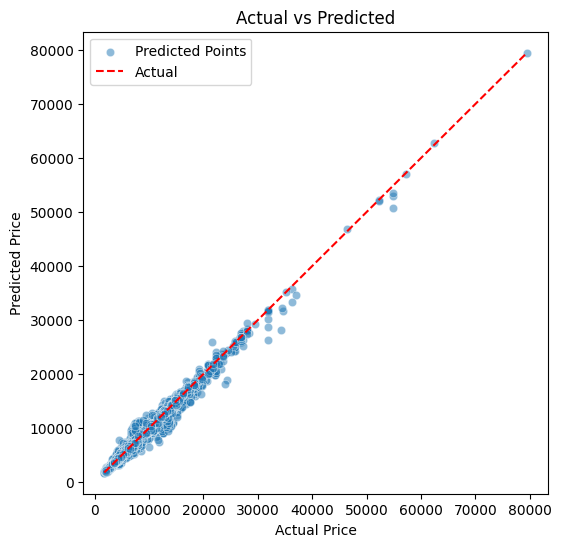

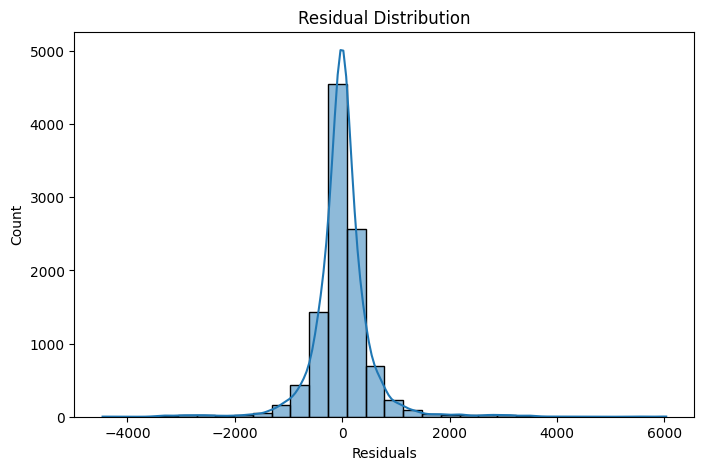

In [58]:
# Predictions
y_pred = best_model.predict(X_full)

# Metrics
mae = mean_absolute_error(y_full, y_pred)
rmse = np.sqrt(mean_squared_error(y_full, y_pred))
r2 = r2_score(y_full, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Actual vs Predicted plot with legend
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_full, y=y_pred, alpha=0.5, label="Predicted Points")
plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()],
         'r--', label="Actual")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

# Residual distribution
residuals = y_full - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


In [59]:
from sklearn.model_selection import cross_val_score, KFold

# 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_full, y_full, cv=kf, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())
print("Std Dev R²:", cv_scores.std())


Cross-Validation R² Scores: [0.88668966 0.91068918 0.91902328 0.90167129 0.90717888]
Mean R²: 0.9050504565238953
Std Dev R²: 0.010771281265145418
